In [11]:
### Load PPS model
%run ./HC_NS_model.ipynb

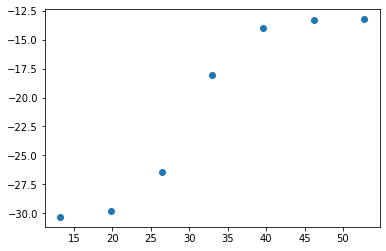

In [12]:
### Visuotactile experiment simulation setup

# Distance points in cm (network coordinates)
v_distances = np.asarray([13.2, 23.1, 33, 42.9, 52.8])
mydistances = np.linspace(v_distances[0], v_distances[-1], 7)

## Simulation setup
simtime = 100  # ms
bi = 0

# Synapses setup
B_0 = 1.5
L_ex, L_in, S_ex, S_in = 0.15, 0.05, 1, 4

# Experimental Data
ymin = -30.35339096578619
ymax = -13.255889461344687
cp = 30.094
slope = 3.0898

HC_S_RTs = RTsig(mydistances, cp, slope)
plt.scatter(mydistances, HC_S_RTs)

In [4]:
def hcsocialmodelrun(theta):
    hcRTs, ZMs, ZTs, ZAs = experimentrun(
        mydistances, simtime, bi, theta[0], L_ex, L_in, S_ex, S_in, B_0
    )
    yf = HC_S_RTs
    xf = hcRTs

    m = (xf.size * np.sum(xf * yf) - np.sum(xf) * np.sum(yf)) / (
        xf.size * np.sum(xf * xf) - np.sum(xf) ** 2
    )
    bias = (np.sum(yf) - m * np.sum(xf)) / xf.size

    if bias > 0:
        bias = 0
    if m < 0:
        m = 0

    cost = np.sum(np.square(np.divide(yf - (m * xf + bias), yf)))

    return cost * 100000


bounds = [(0.1, 1.5)]
hcsocialres_mgain = differential_evolution(hcsocialmodelrun, bounds, disp=True)

differential_evolution step 1: f(x)= 4138.15
differential_evolution step 2: f(x)= 3785.3
differential_evolution step 3: f(x)= 3785.3
differential_evolution step 4: f(x)= 3511.88
differential_evolution step 5: f(x)= 2104.55
differential_evolution step 6: f(x)= 1853.88
differential_evolution step 7: f(x)= 1853.88
differential_evolution step 8: f(x)= 1313.68
differential_evolution step 9: f(x)= 1313.68
differential_evolution step 10: f(x)= 1313.68
differential_evolution step 11: f(x)= 1313.68
differential_evolution step 12: f(x)= 1313.68
differential_evolution step 13: f(x)= 1313.68
differential_evolution step 14: f(x)= 1313.68
differential_evolution step 15: f(x)= 1313.68
differential_evolution step 16: f(x)= 1313.68
differential_evolution step 17: f(x)= 1313.68
differential_evolution step 18: f(x)= 1313.68
differential_evolution step 19: f(x)= 1313.68
differential_evolution step 20: f(x)= 1313.68
differential_evolution step 21: f(x)= 1313.68
differential_evolution step 22: f(x)= 1313.68

In [5]:
print(hcsocialres_mgain)

     fun: 1313.683305810817
 message: 'Optimization terminated successfully.'
    nfev: 347
     nit: 22
 success: True
       x: array([0.10046694])


In [13]:
asdRTs, ZMs, ZTs, ZAs = experimentrun(
    mydistances, simtime, bi, 0.10046694, L_ex, L_in, S_ex, S_in, B_0
)

8.240677301182185 -3.30671302911229


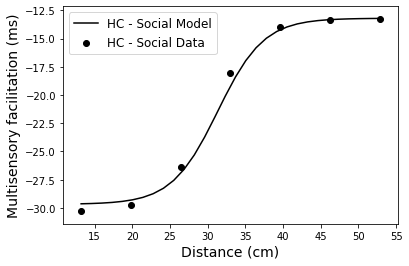

In [14]:
xf = asdRTs
yf = HC_S_RTs
m = (xf.size * np.sum(xf * yf) - np.sum(xf) * np.sum(yf)) / (
    xf.size * np.sum(xf * xf) - np.sum(xf) ** 2
)
bias = (np.sum(yf) - m * np.sum(xf)) / xf.size

ymin, ymax = np.min(m * xf + bias), np.max(m * xf + bias)
dc, h = sigfit(mydistances, m * xf + bias)
mydistances_exp = np.linspace(v_distances[0], v_distances[-1], 30)
yf_exp = RTsig(mydistances_exp, dc, h)

plt.figure(1)
plt.plot(mydistances_exp, yf_exp, label="HC - Social Model", color="k")
plt.scatter(mydistances, HC_S_RTs, label="HC - Social Data", color="k")
plt.ylabel("Multisensory facilitation (ms)", size=14)
plt.xlabel("Distance (cm)", size=14)
plt.legend(prop={"size": 12})
print(m, bias)

In [15]:
socialhc = np.asarray([yf_exp, yf])
np.save("Results/socialhc.npy", socialhc)

In [16]:
from sklearn import metrics

print(metrics.mean_squared_error(yf, m * xf + bias, squared=False))

0.7617268323957492
